Epoch 1/50


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1913 - val_loss: 0.0151
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114 - val_loss: 0.0071
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0061
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0037


d:\Python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_16636\292439756.py:93: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_features.fillna(method='ffill', inplace=True)  # Forward fill missing values


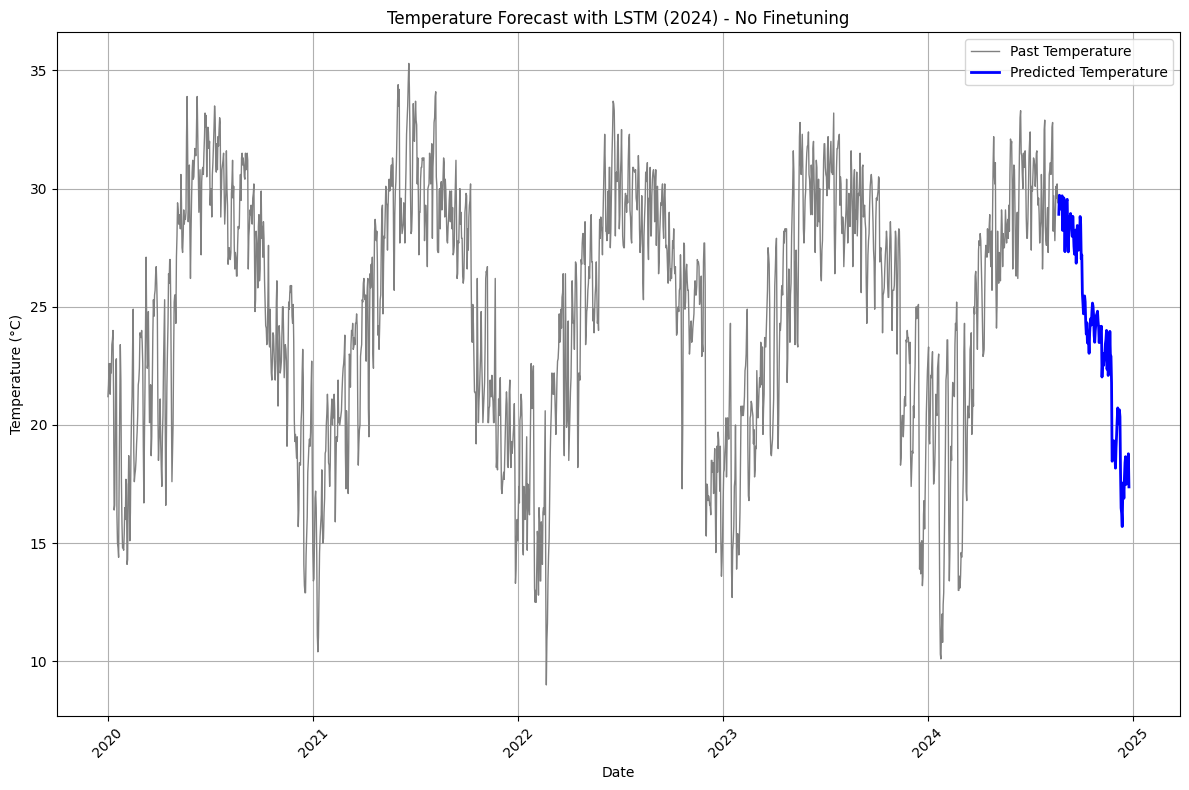

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '../dataset/Data.csv'  # Path to the dataset
data = pd.read_csv(file_path)  # Read the dataset into a DataFrame

# Step 2: Prepare the data
data['datetime'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y')  # Convert datetime column to datetime objects
data['day_of_year'] = data['datetime'].dt.dayofyear  # Extract the day of the year from the datetime

# Step 3: Extract features and labels
X = data[['temp', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'sealevelpressure', 'humidity', 'day_of_year']]  # Related Features
y = data['temp']  # Target variable: temperature

# Step 4: Normalize the features and labels
scaler_X = MinMaxScaler()  # Initialize the scaler for features
scaler_y = MinMaxScaler()  # Initialize the scaler for labels
X_scaled = scaler_X.fit_transform(X)  # Scale features
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Scale labels

# Step 5: Create sequences for LSTM
def create_sequences(data, labels, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])  # Append sequence of features
        y_seq.append(labels[i+seq_length])  # Append corresponding label
    return np.array(X_seq), np.array(y_seq)

seq_length = 7  # Length of sequences for LSTM
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)  # Create sequences

# Step 6: Train-test split
# Define the split index
split_index = int(len(X_seq) * 0.8)

# Split the data
X_train = X_seq[:split_index]
X_test = X_seq[split_index:]
y_train = y_seq[:split_index]
y_test = y_seq[split_index:]


# Step 7: Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_seq.shape[2])))  # LSTM layer
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mse')  # Compile the model

# Step 8: Train the model
model.fit(X_train, y_train, epochs=50, verbose=1, validation_split=0.1)  # Train the model with validation split

# Step 9: Make predictions
y_pred_scaled = model.predict(X_test)  # Predict on the test set
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Inverse transform predictions
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform actual values

# Step 10: Evaluate the model
r2 = r2_score(y_test, y_pred)  # Calculate R² score
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE

print(f"R² Score: {r2:.3f}")  # Print R² score
print(f"RMSE: {rmse:.3f}")  # Print RMSE
print(f"MAE: {mae:.3f}")  # Print MAE

# Step 11: Generate future dates
future_dates = pd.date_range(start='2024-08-21', end='2024-12-31')  # Define the range for future dates
future_day_of_year = future_dates.dayofyear  # Extract the day of year for future dates

# Step 12: Create future features using historical averages
historical_averages = data.groupby('day_of_year')[['temp', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'sealevelpressure', 'humidity']].mean()  # Calculate historical averages

# Step 13: Create a DataFrame with future dates
future_features = pd.DataFrame({
    'day_of_year': future_day_of_year  # Add day of year for future dates
})

# Add historical averages to future features
for col in ['temp', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'sealevelpressure', 'humidity']:
    future_features[col] = future_features['day_of_year'].map(historical_averages[col])  # Map historical averages to future features

# Ensure future_features has the same columns in the same order as when fitting the scaler
future_features = future_features[['temp', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'sealevelpressure', 'humidity', 'day_of_year']]

# Handle any missing values by filling with the forward fill method
future_features.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Normalize future features
future_features_scaled = scaler_X.transform(future_features)  # Scale future features

# Step 14: Create sequences for future prediction
future_sequences, _ = create_sequences(future_features_scaled, np.zeros(len(future_features_scaled)), seq_length)  # Create sequences for future predictions

# Ensure future_sequences length is compatible with predictions
num_future_sequences = len(future_sequences)
if num_future_sequences < len(future_dates) - seq_length:
    future_dates = future_dates[-num_future_sequences:]  # Adjust future_dates if necessary

# Step 15: Predict future temperatures
future_predictions_scaled = model.predict(future_sequences)  # Predict future temperatures
future_predictions = scaler_y.inverse_transform(future_predictions_scaled)  # Inverse transform predictions

# Step 16: Save predictions
future_data = pd.DataFrame({
    'Date': future_dates[:len(future_predictions)],  # Dates for predictions
    'Predicted Temperature': future_predictions.flatten()  # Forecasted temperatures
})
future_data.to_csv('future_weather_predictions_lstm_2024.csv', index=False)  # Save predictions to a CSV file

# Step 17: Plot the forecasted temperature and historical data
plt.figure(figsize=(12, 8))
plt.plot(data['datetime'], data['temp'], color='grey', label='Past Temperature', linewidth=1)  # Plot historical temperature data as a grey line
plt.plot(future_data['Date'], future_data['Predicted Temperature'], color='blue', label='Predicted Temperature', linewidth=2)  # Plot forecasted temperature as a blue line
plt.title("Temperature Forecast with LSTM (2024) - No Finetuning")  # Title of the plot
plt.xlabel("Date")  # X-axis label
plt.ylabel("Temperature (°C)")  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot
